In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_excel("Группы 22 _ 1.xlsx")

In [3]:
data.head()

,Unnamed: 0,Пол,Высшая школа,Округ,Спорт,Цвет глаз,Во сколько встаете,Курение,К/ч
0,Анисимов Никита Станиславович,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Алферова Ирина Александровна,0,Эк и Б,ВАО,0.0,Карий,9.0,0.0,ч
2,Беляева Татьяна Александровна,0,Кибер,ЮЗАО,1.0,Голубой,9.0,0.0,ч
3,Беляков Николай Николаевич,1,Кибер,САО,1.0,Зеленый,10.0,1.0,к
4,Будаева Елизавета Константиновна,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Unnamed: 0', 'Пол', 'Высшая школа', 'Округ', 'Спорт', 'Цвет глаз',
       'Во сколько встаете', 'Курение', 'К/ч'],
      dtype='object')

In [5]:
data.shape

(30, 9)

In [6]:
data = data.drop(['Unnamed: 0'],axis = 1)

In [7]:
data = data.dropna()

In [8]:
data.shape

(21, 8)

In [9]:
data.describe()

,Пол,Спорт,Во сколько встаете,Курение
count,21.000000,21.000000,21.000000,21.000000
mean,0.476190,0.666667,8.190476,0.380952
std,0.511766,0.483046,1.569046,0.497613
min,0.000000,0.000000,6.000000,0.000000
25%,0.000000,0.000000,7.000000,0.000000
50%,0.000000,1.000000,8.000000,0.000000
75%,1.000000,1.000000,9.000000,1.000000
max,1.000000,1.000000,12.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 29
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Пол                 21 non-null     int64  
 1   Высшая школа        21 non-null     object 
 2   Округ               21 non-null     object 
 3   Спорт               21 non-null     float64
 4   Цвет глаз           21 non-null     object 
 5   Во сколько встаете  21 non-null     float64
 6   Курение             21 non-null     float64
 7   К/ч                 21 non-null     object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.5+ KB


In [11]:
le = preprocessing.LabelEncoder()

In [12]:
list1 = ['Пол', 'Высшая школа', 'Округ', 'Спорт', 'Цвет глаз',
       'Во сколько встаете', 'Курение', 'К/ч']

In [13]:
for i in list1:
    data[i] = le.fit_transform(data[i])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 29
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Пол                 21 non-null     int64
 1   Высшая школа        21 non-null     int64
 2   Округ               21 non-null     int64
 3   Спорт               21 non-null     int64
 4   Цвет глаз           21 non-null     int64
 5   Во сколько встаете  21 non-null     int64
 6   Курение             21 non-null     int64
 7   К/ч                 21 non-null     int64
dtypes: int64(8)
memory usage: 1.5 KB


In [15]:
data.head()

,Пол,Высшая школа,Округ,Спорт,Цвет глаз,Во сколько встаете,Курение,К/ч
1,0,4,0,0,2,3,0,1
2,0,0,7,1,0,3,0,1
3,1,0,2,1,1,4,1,0
5,0,4,4,0,1,4,0,1
6,0,0,7,1,2,3,0,1


<function matplotlib.pyplot.show(*args, **kw)>

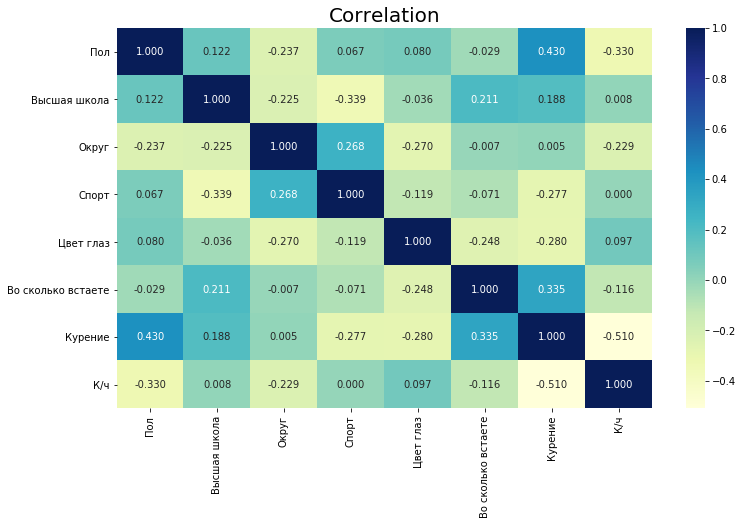

In [16]:
fig = plt.figure(figsize = (12, 7))
sns.heatmap(data.corr(),annot=True, cmap='YlGnBu', fmt = '.3f')
plt.title('Correlation',fontsize = 20)

plt.show

In [17]:
data.head()

,Пол,Высшая школа,Округ,Спорт,Цвет глаз,Во сколько встаете,Курение,К/ч
1,0,4,0,0,2,3,0,1
2,0,0,7,1,0,3,0,1
3,1,0,2,1,1,4,1,0
5,0,4,4,0,1,4,0,1
6,0,0,7,1,2,3,0,1


In [18]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 7].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 0)

In [20]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 1.29099445,  1.32059129, -0.2628752 ,  0.8819171 ,  2.12132034,
        -1.53632948, -0.8819171 ],
       [ 1.29099445, -0.90356246,  0.50185265,  0.8819171 ,  0.70710678,
        -0.83400743, -0.8819171 ],
       [ 1.29099445,  0.76455285, -1.40996697,  0.8819171 , -2.12132034,
        -0.13168538, -0.8819171 ],
       [-0.77459667, -0.90356246,  1.2665805 ,  0.8819171 , -2.12132034,
         0.57063667, -0.8819171 ],
       [ 1.29099445, -0.90356246,  1.2665805 ,  0.8819171 , -0.70710678,
         1.27295872,  1.13389342]])

In [22]:
y_train

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0])

In [23]:
y_test

array([0, 1, 1, 1, 0])

In [24]:


from math import sqrt
class KNN(): 
    def __init__(self,k):
        self.k=k
    def fit(self,X_train,y_train):
        self.x_train=X_train
        self.y_train=y_train
    def calculate_euclidean(self,sample1,sample2):
        distance=0.0
        for i in range(len(sample1)):
          distance+=(sample1[i]-sample2[i])**2
        return sqrt(distance)
    def nearest_neighbors(self,test_sample):
        distances=[]
        for i in range(len(self.x_train)):
          distances.append((self.y_train[i],self.calculate_euclidean(self.x_train[i],test_sample)))
        distances.sort()
        neighbors=[]
        for i in range(self.k):
          neighbors.append(distances[i][0])
        return neighbors
    def predict(self,test_set):
        predictions=[]
        for test_sample in test_set:
          neighbors=self.nearest_neighbors(test_sample)
          labels=[sample for sample in neighbors]
          prediction=max(labels,key=labels.count)
          predictions.append(prediction)
        return predictions



In [25]:


model=KNN(5) #our model
model.fit(X_train,y_train)



In [26]:
predictions = model.predict(X_test)

In [27]:
cm = confusion_matrix(y_test, predictions)
print(cm)
accuracy_score(y_test, predictions)

[[2 0]
 [3 0]]


0.4

In [28]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
print(confusion_matrix(y_test, y_pred))

[[1 1]
 [2 1]]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.50      0.33      0.40         3

    accuracy                           0.40         5
   macro avg       0.42      0.42      0.40         5
weighted avg       0.43      0.40      0.40         5



In [32]:
error = []

for i in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

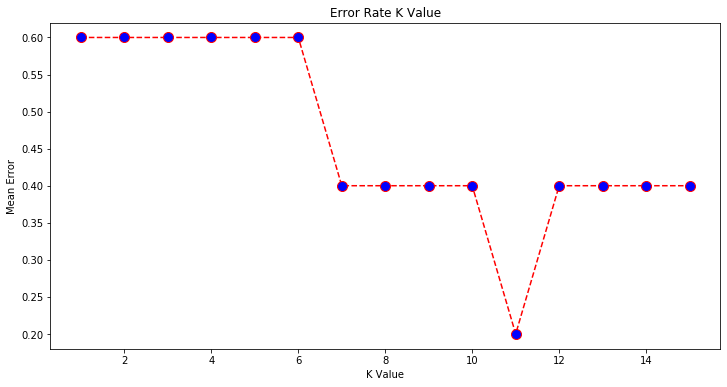

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')